# K最近傍回帰

In [27]:
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import preprocesses
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
import numpy as np

In [28]:
#データの読み込み
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [29]:
new_train=train[preprocesses.train_valiable_list]
new_test=test[preprocesses.test_valiable_list]
new_train=preprocesses.preprocess(new_train)
new_test=preprocesses.preprocess(new_test)
new_train["SalePrice"]=np.log(new_train["SalePrice"])

/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t[k]= t[k].map(five_map1)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t["BsmtExposure"]= t["BsmtExposure"].map(five_map2)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [30]:
RMSE=[]
r2_scores=[]
for k in range(1,50):
    print(k,end=" ")
    model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', KNeighborsRegressor(n_neighbors=k))])
    k_fold = KFold(n_splits=5)
    test_MSE = cross_validate(model, new_train.drop(["SalePrice"], axis=1), new_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1)
    RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
    r2_scores.append(np.mean(test_MSE['test_r2']))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [32]:
print(RMSE[0:30])
print(r2_scores[0:30])
print(np.min(RMSE))
print(RMSE.index(np.min(RMSE)))#9で最小

[0.27636537315143295, 0.2413534348764733, 0.22843818589091788, 0.22557445532666484, 0.22400973487257506, 0.2237350673249137, 0.22306733320670064, 0.2230824043048015, 0.22203969923747005, 0.22260882931988463, 0.224026940580872, 0.22558948668028742, 0.2268362086614592, 0.22824904738436522, 0.22868732461691552, 0.22980579244132512, 0.23097779497439605, 0.23164991707669458, 0.23238977102260744, 0.23322316868787207, 0.23397793052410423, 0.2357520666159543, 0.2364903727329428, 0.2374400370330717, 0.23824721540870294, 0.23884872635477947, 0.2399345744764342, 0.2407492037425962, 0.24203492346749036, 0.24281396636566485]
[0.518715569662596, 0.6343577795251754, 0.6720132297297696, 0.6801701644432289, 0.6842594124001078, 0.6847891999365263, 0.6868115865788206, 0.6867369248408071, 0.6897975618380893, 0.6880110930997534, 0.68386794891678, 0.6792565793408893, 0.6757368108822465, 0.6718399972362082, 0.670901648398339, 0.6675678246869137, 0.6641344652621886, 0.6623965259565985, 0.6601560477296902, 0.6

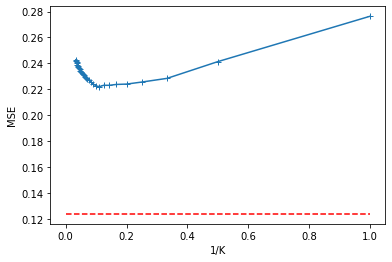

In [35]:
plt.plot(1/np.array(range(1,31)),RMSE[0:30],"+-")
plt.hlines([0.12381220676923944], 0,1, "red", linestyles='dashed')
plt.xlabel("1/K")
plt.ylabel("MSE")
plt.show()

### 次元を減らしてみる
K-meansでは次元の呪い(curse of dimensionally)が起こっていそうなので、
次元を減らしてみる。<BR>
 LinearRegressionにおいてforward selectionを行い、説明変数を5,10,15,20,25,30,35,40個取り出して結果を比べてみた。

In [36]:
new_train_valiable_list5=['OverallQual', 'OverallCond', '1stFlrSF', 'GarageCars', 'Baths']
new_train_valiable_list10=['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinType1', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FireplaceQu', 'GarageCars', 'Baths']
new_train_valiable_list15=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'ScreenPorch', 'Baths']
new_train_valiable_list20=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC', 'Baths']
new_train_valiable_list25=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Baths']
new_train_valiable_list30=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'Baths']
new_train_valiable_list35=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'Baths']
new_train_valiable_list40=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'YrSold', 'Baths']

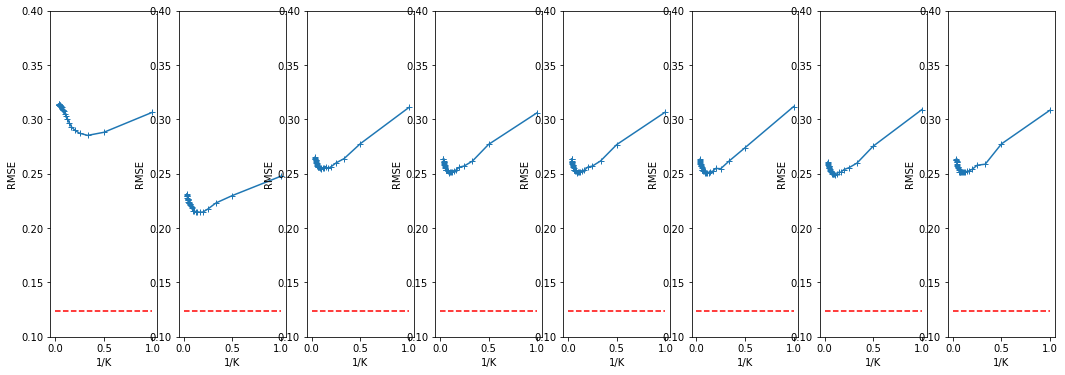

In [39]:
cnt=0
plt.figure(figsize=(18,6))
for valiables in [new_train_valiable_list5,new_train_valiable_list10,new_train_valiable_list15,new_train_valiable_list20,new_train_valiable_list25,new_train_valiable_list30,new_train_valiable_list35,new_train_valiable_list40]:
    RMSE=[]
    r2_scores=[]
    N=30
    for k in range(1,N):
        model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', KNeighborsRegressor(n_neighbors=k))])
        k_fold = KFold(n_splits=5)
        test_MSE = cross_validate(model, new_train[valiables], new_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1)
        RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
        r2_scores.append(np.mean(test_MSE['test_r2']))
    cnt+=1
    plt.subplot(1,8,cnt)
    plt.plot(1/np.array(range(1,N)),RMSE[0:N],"+-")
    plt.hlines([0.12381220676923944], 0,1, "red", linestyles='dashed')
    plt.xlabel("1/K")
    plt.ylabel("RMSE")
    plt.ylim([0.1,0.4])
plt.show()

10個の説明変数を取った時がもっともMSEが小さかった。それ以降は説明変数を多く取ってもあまりMSEは変わらなかった。
これはLinearRegressionでの結果より少ない。<BR>
説明変数の数が少ないほどK-neighborhoodはうまく働くからであると思われる。また、全てにおいてLinearRegressionの方がMSEが小さいので、予測変数とSalesPriceの間に線形に近い関係があることが多いとみなせる。(これは前処理で選択したn段階評価の説明変数について、評価が高いほどSalesPriceが高いという単純な線形関係がみられるからだと思われる。)

一番良かったp=10,K=6の結果を提出してみる

In [41]:
model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', KNeighborsRegressor(n_neighbors=6))])
model.fit(new_train[new_train_valiable_list10], new_train["SalePrice"])

# make predictions
yt =model.predict(new_test[new_train_valiable_list10])
output_df=new_test.copy()
output_df["SalePrice"] = np.exp(yt)#値段に戻す
output_df["Id"]=test["Id"]
output_df.to_csv("output.csv",index=False, columns=['Id','SalePrice'])
!head output.csv

Id,SalePrice
1461,123201.67401600083
1462,152937.07711343357
1463,177499.75366715956
1464,177258.7011957651
1465,185496.25610125734
1466,172781.82815147974
1467,164086.00636400923
1468,171837.01183006822
1469,184659.43908848416


In [42]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f output.csv -m  "K-neighbor" 

100%|██████████████████████████████████████| 33.7k/33.7k [00:04<00:00, 8.35kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques

スコアは0.21823であった。かなり悪い。